In [35]:
import numpy as np

In [36]:
import matplotlib.pyplot as plt 

In [37]:
import cv2

In [38]:
import glob

In [39]:
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (19.0, 17.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [40]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
data_dir = './dataset/dataset/'

In [42]:
classes = ['broadleaf', 'grass', 'soil', 'soybean'] 

In [43]:
num_file = 1100 
all_files = [] 
num_data =num_file*len(classes)
Y = np.zeros(num_data)

In [44]:
for i, cls in enumerate(classes):
    all_files += [f for f in glob.glob(data_dir+cls+'/*.tif')][:num_file]
    Y[i*num_file:(i+1)*num_file] = i # label all classes with int [0.. len(classes)]

In [45]:
all_files

['./dataset/dataset/broadleaf\\1.tif',
 './dataset/dataset/broadleaf\\10.tif',
 './dataset/dataset/broadleaf\\100.tif',
 './dataset/dataset/broadleaf\\1000.tif',
 './dataset/dataset/broadleaf\\1001.tif',
 './dataset/dataset/broadleaf\\1002.tif',
 './dataset/dataset/broadleaf\\1003.tif',
 './dataset/dataset/broadleaf\\1004.tif',
 './dataset/dataset/broadleaf\\1005.tif',
 './dataset/dataset/broadleaf\\1006.tif',
 './dataset/dataset/broadleaf\\1007.tif',
 './dataset/dataset/broadleaf\\1008.tif',
 './dataset/dataset/broadleaf\\1009.tif',
 './dataset/dataset/broadleaf\\101.tif',
 './dataset/dataset/broadleaf\\1010.tif',
 './dataset/dataset/broadleaf\\1011.tif',
 './dataset/dataset/broadleaf\\1012.tif',
 './dataset/dataset/broadleaf\\1013.tif',
 './dataset/dataset/broadleaf\\1014.tif',
 './dataset/dataset/broadleaf\\1015.tif',
 './dataset/dataset/broadleaf\\1016.tif',
 './dataset/dataset/broadleaf\\1017.tif',
 './dataset/dataset/broadleaf\\1018.tif',
 './dataset/dataset/broadleaf\\1019.tif',

In [46]:
# Image dimension
im_width = 200
im_height = 200 
im_channel = 3
dim = im_width * im_height * im_channel


In [47]:
X = np.ndarray(shape=(num_data, im_width, im_height, im_channel), dtype=np.float64)

In [48]:
for idx, file in enumerate(all_files):
    X[idx] = cv2.resize(cv2.imread(file), (im_width, im_height))

In [49]:
X_train = np.empty(shape=(4000,im_width, im_height, im_channel), dtype=np.float64)
X_val = np.empty(shape=(200,im_width, im_height, im_channel), dtype=np.float64)
X_test = np.empty(shape=(200,im_width, im_height, im_channel), dtype=np.float64)

In [50]:
y_train = np.empty(4000)
y_val = np.empty(200)
y_test = np.empty(200) 

In [51]:
for i, cls in enumerate(classes): 
    X_test[50*i:50*(i+1)] = X[np.where(Y == i)[0][:50]]
    X_val[50*i:50*(i+1)] = X[np.where(Y == i)[0][50:100]]
    X_train[1000*i:1000*(i+1)] = X[np.where(Y == i)[0][100:]]
    
    y_test[50*i:50*(i+1)] = i
    y_val[50*i:50*(i+1)] = i
    y_train[1000*i:1000*(i+1)] = i

In [52]:
del Y 
del X

In [53]:
# Extract features 
#Shuffle training index
train_idxs = np.random.permutation(X_train.shape[0])
y_train  = y_train[train_idxs].astype(int)
X_train = X_train[train_idxs]

In [54]:
X_train = np.reshape(X_train, (X_train.shape[0], -1)).astype('float64')
X_test = np.reshape(X_test, (X_test.shape[0], -1)).astype('float64')
X_val = np.reshape(X_val, (X_val.shape[0], -1)).astype('float64')

In [55]:
X_tiny = X_train[100:110].astype('float64')
y_tiny = y_train[100:110].astype(int)
num_dev = 500

In [56]:
X_dev = X_train[0:num_dev].astype('float64')
y_dev = y_train[0:num_dev].astype(int)
print("X_train shape", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape", X_test.shape, "| y_test shape:", y_test.shape)
print("X_val shape", X_val.shape, "| y_val shape:", y_val.shape)
print("X_dev shape", X_dev.shape, "| y_dev shape:", y_dev.shape)
print("X_tiny shape", X_tiny.shape, "| y_tiny shape:", y_tiny.shape)

X_train shape (4000, 120000) | y_train shape: (4000,)
X_test shape (200, 120000) | y_test shape: (200,)
X_val shape (200, 120000) | y_val shape: (200,)
X_dev shape (500, 120000) | y_dev shape: (500,)
X_tiny shape (10, 120000) | y_tiny shape: (10,)


In [57]:
#Subtract out the mean image 
#first: compute the mean image
# mean_image = np.mean(X_train, axis=0) #axis=0. stack horizontally
mean_image = 128
#Second subtract the mean image from train and test data 
X_train -= mean_image
X_val -= mean_image 
X_test -= mean_image
X_dev -= mean_image
X_tiny -= mean_image


In [58]:
#Third append the bias dimension using linear algebra trick
#Not for net
# X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
# X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
# X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
# X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
# X_tiny = np.hstack([X_tiny, np.ones((X_tiny.shape[0], 1))])

print('=====STACK BIAS term=====')
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("X_val shape", X_val.shape)
print("X_dev shape", X_dev.shape)
print("X_tiny shape", X_tiny.shape)

=====STACK BIAS term=====
X_train shape (4000, 120000)
X_test shape (200, 120000)
X_val shape (200, 120000)
X_dev shape (500, 120000)
X_tiny shape (10, 120000)


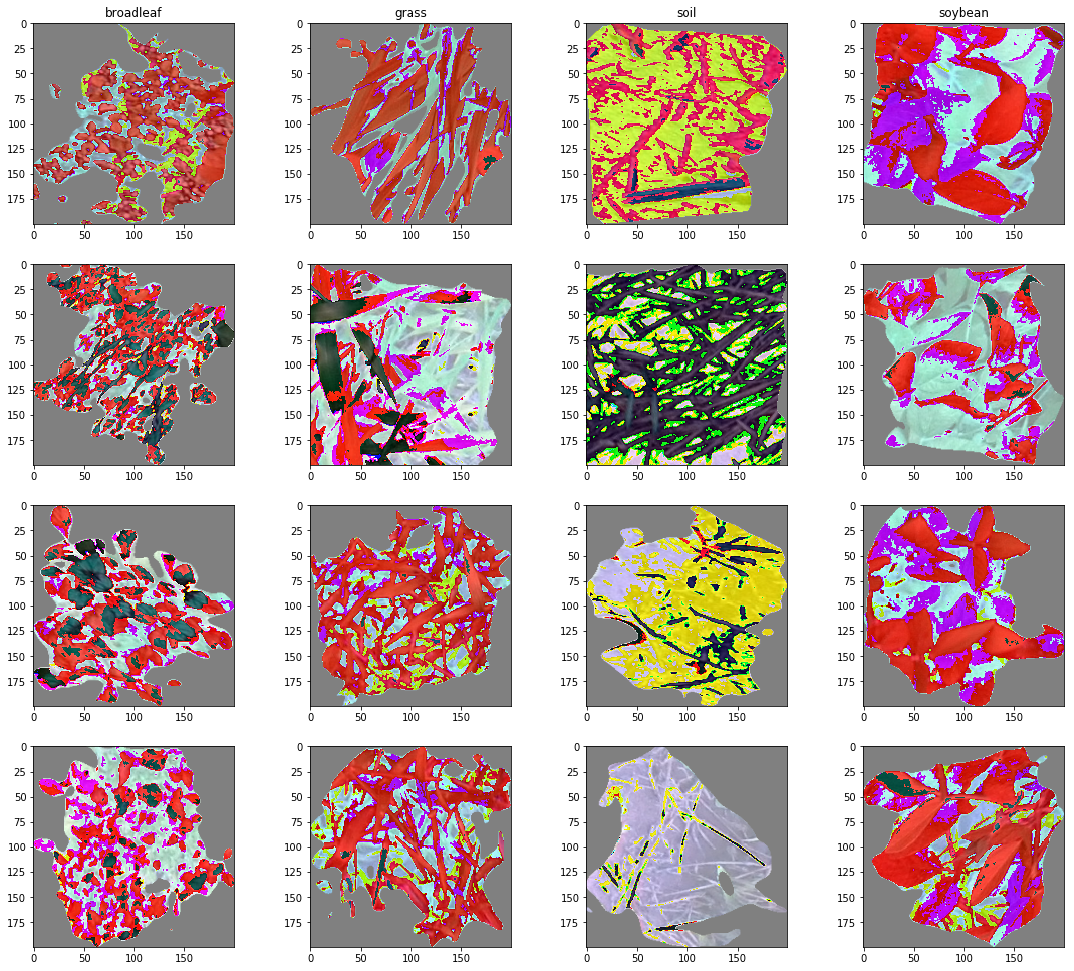

In [59]:
# Make sure that everything when OK
classes = ['broadleaf', 'grass', 'soil', 'soybean']
n_class = len(classes)
samples_per_class = 4


for y, cls in enumerate(classes):
    idxes = np.flatnonzero(y == y_train)
    idxes = np.random.choice(idxes, samples_per_class, replace = False)
    for i, idx in enumerate(idxes):
        plt_idx = i * n_class + y + 1
        plt.subplot(samples_per_class,n_class, plt_idx)
        plt.imshow(X_train[idx].reshape(im_width, im_height, im_channel).astype('uint8'))
        if(i==0): plt.title(cls)

plt.show()